# Predicting heart disease using Machine Learning

This notebook looks into using Python-based machine learning and data science libraries in an attempt to build a machine model capable of predicting whether a patient has heart disease based on their medical attributes.

Approach to be taken:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

We are using pandas, Matplotlib and NumPy for data analysis and manipulation.

In [53]:
# Import all the necessary tools

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to show plots inside notebook
%matplotlib inline 

# Models from SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape #(rows, columns)

(303, 14)

## Data Exploration (EDA)

The goal is to find out more about the data and become a subject matter expert on the current dataset.

1. What questions are we trying to solve?
2. What kind of data we have and how to treat different types?
3. What's missing from the data and how to deal with it?
4. Outliers? Where? And why do we care?
5. How to add, change or remove features to get more out of the data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# How many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

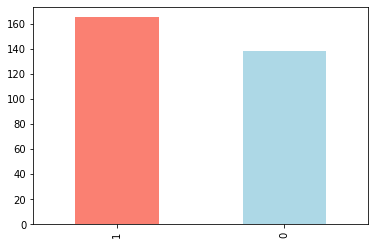

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender

In [10]:
df.sex.value_counts() 

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


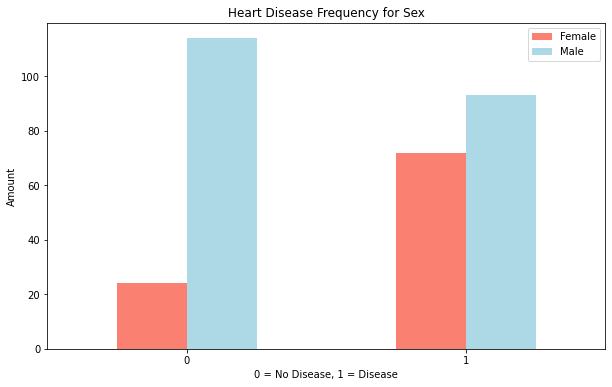

In [12]:
# Plot crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Heart Disease Frequency according to Exercise-induced Angina(exang)

In [13]:
df.exang.value_counts() #1 - yes, 0 - no

0    204
1     99
Name: exang, dtype: int64

In [14]:
# Compare exang with target column
pd.crosstab(df.target, df.exang)

exang,0,1
target,,
0,62,76
1,142,23


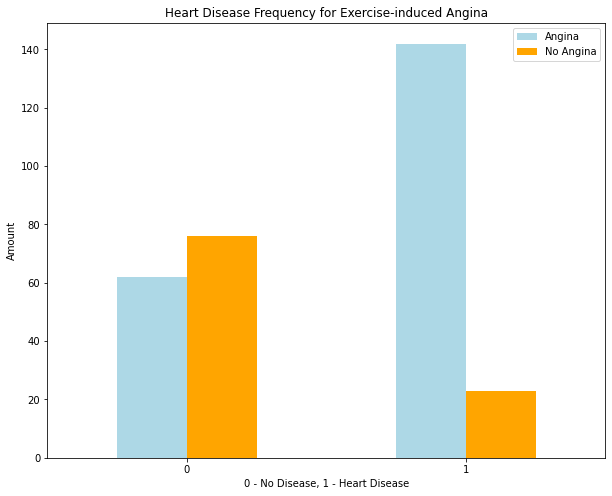

In [15]:
# Plot crosstab
pd.crosstab(df.target, df.exang).plot(kind='bar', figsize=(10,8), color=['lightblue', 'orange'])

plt.title("Heart Disease Frequency for Exercise-induced Angina")
plt.xlabel('0 - No Disease, 1 - Heart Disease')
plt.ylabel('Amount')
plt.legend(["Angina", "No Angina"])
plt.xticks(rotation=0);

### Age vs Max Heart rate for Heart Disease

Combining independent variables, such as `age` and `thalach` (maximum heart rate), and then comparing them to the target variable `heart disease`.

As there are so many different values for `age` and `thalach`, we will use a scatter plot.

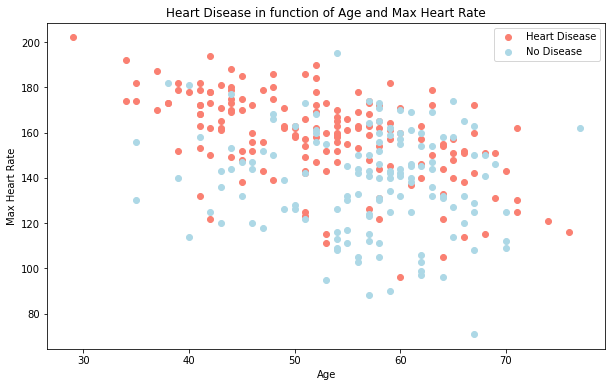

In [16]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

# Add useful information
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Disease"]);

Upon observation of the scatter plot, it looks like the younger a participant is, the higher their max heart rate.
However, there seems to be more data gathered from older participants. It would be useful to check the age distribution of our dataset.

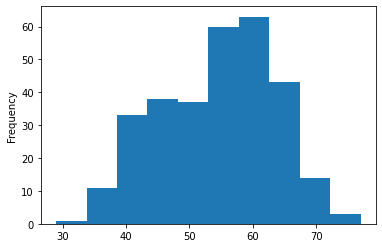

In [17]:
# Check distribution of the age column with a histogram
df.age.plot.hist();

We can see it's a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) but slightly swaying to the right, which it is also reflected in the scatter plot above.

### Heart Disease Frequency per Chest Pain Type

This time, we are going to compare our target with `cp` (chest pain).

As a reminder:

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


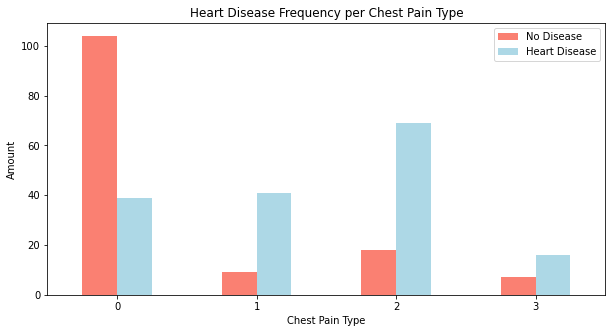

In [19]:
# Making crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10, 5),
                                  color=["salmon", "lightblue"])

# Add some useful information
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Heart Disease"])
plt.xticks(rotation=0);

According to the data, the atypical angina(Chest Pain Type 1) describes a high ratio of participants with heart disease than not, given that it is described as not being related to the heart.

However, we are not experts in this subject. At this point, it is important to remember that there may be a need to pursue further research on the independent values, if the data dictionary does not supply enough information on the subjects.

This research may come in the form of asking a **subject matter expert**(cardiologist, or the person who provided the data), or search online to find out more.

According to PubMed, "atypical chest pain" is a term that [seems to confuse some medical professionals](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/):

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Even though our research was not conclusive, the graph above is a hint at the confusion of definitions that are being represented in data.

### Correlation between independent variables

We will be comparing all of the independent variables in one hit, as it may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


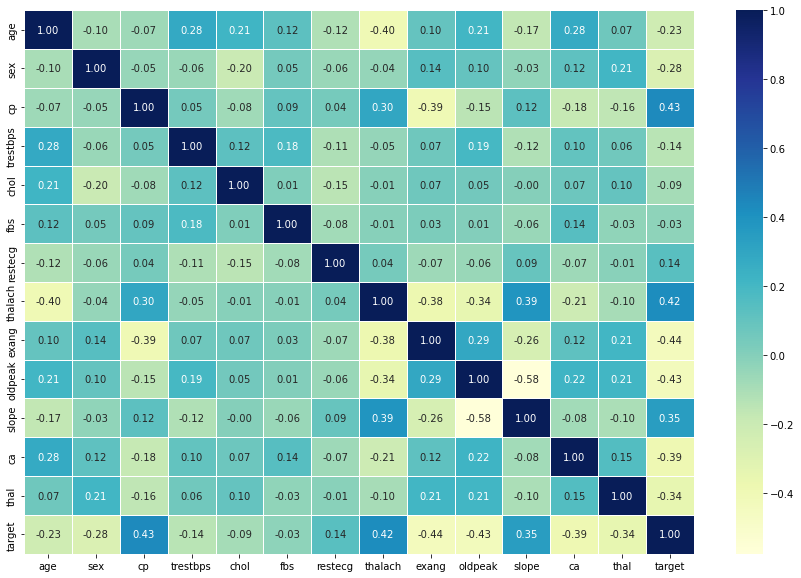

In [22]:
# Make the correlation matrix easier to visualise
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

**Exploratory Data Analysis(EDA) is performed to start building an intuition of the dataset.**

Thus far, we understand that the data seems to be well distributed, apart from the `sex` variable.

To drive our next questions, we will be using machine learning models. This is called **model-driven EDA**.

**Reminder:**
* Not every EDA will look the same - this is an example for structured, tabular datasets
* This was not the sole form of data visualisation, there are many others
* The purpose is to quickly find:
    * Distributions(`df.column.hist()`)
    * Missing values(`df.info()`)
    * Outliers

## 5. Modelling

We will be using machine learning to predict our target variable based on the 13 independent variables we have at our disposal.

* The problem:

> *Given clinical parameters about a patient, can we predict whether they have heart disease?*

* The evaluation metric:

> *If we can reach 95% accuracy at predicting whether a patient has heart disease during the proof of concept, we will pursue this project.*

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


To predict the target variable using the other ones, we will start by splitting the target variable from them.

In [24]:
# Split into X & y
X = df.drop('target', axis=1)

# Target variable
y = df['target']

In [25]:
# Independent variables
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
# Targets
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Training and test split

In [27]:
# Random seed for reproducibility
np.random.seed(42)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

* We will be using 242 samples to train the model.

In [30]:
y_test, len(y_test)

(179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64,
 61)

* We will be testing the model on 61 samples.

### Model choices

The following models will be used, and we will be comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

These models were chosen by following the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). However, Logistic Regression is not present in this chart even though it's [a model for classification](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

Since our dataset is relatively small, we can experiment to find which algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we chose implement the same methods for fitting them to the data as well as evaluating them, they will be stored in a dictionary. Then, we will create a function which fits and scores them.

In [31]:
# Put models in a dict

models ={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of different SKlearn machine learning models
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing lables
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate and append scores to model_scores
        model_scores[name] = round(model.score(X_test, y_test) * 100, 1)
    return model_scores
        

In [32]:
model_scores = fit_and_score(models= models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/Users/martapbasto/Documents/Education/WebDev/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 88.5, 'KNN': 68.9, 'Random Forest': 83.6}

### Model Comparison

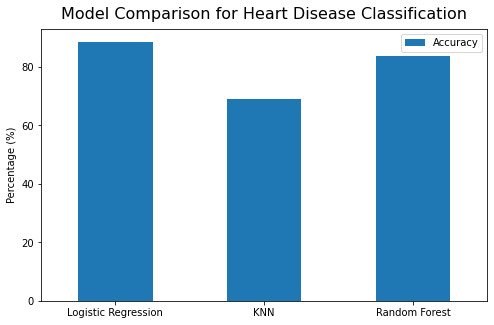

In [33]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
ax = model_compare.T.plot.bar(rot=0, figsize=(8, 5))
ax.set_ylabel('Percentage (%)')
ax.set_title('Model Comparison for Heart Disease Classification', pad=10, fontsize=16);

## Hyperparameter Tuning and Cross-validation

**Game plan:**
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### KNN tuning by hand (K-Nearest Neighbours or KNeighborsClassifier)

We will be tuning the number of neighbours(the default is 5).

In [34]:
train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit algorithm
    knn.fit(X_train, y_train)

    # Update training scores list
    train_score.append(knn.score(X_train, y_train))
    # Update testing scores
    test_score.append(knn.score(X_test, y_test))


In [35]:
# Verifying training scores
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
# Verifying testing scores
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In order to understand these results better, we have plotted them below.

Maximum KNN score on the test data: 75.41%


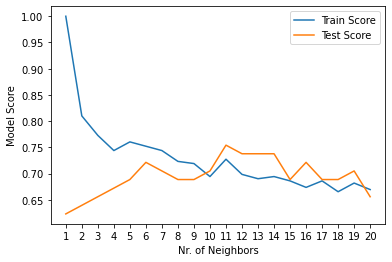

In [37]:
plt.plot(neighbors, train_score, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Nr. of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_score)*100:.2f}%')

According to the data above, the model appears to work best when the number of neighbours is 11.

## Hyperparameter tuning with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

For `LogisticRegression` and `RandomForestClassifier`, we will be using `RandomizedSearchCV` to tune both models.

Firstly, we will be creating hyperparameter grids for each model. Then, we will use `RandomizedSearchCV` to test them out.

In [38]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20), 
                'solver': ['liblinear']}

# Create hyperparameter grid for RandomForestClassifier

rf_grid = {'n_estimators': np.arange(10, 1000, 50), 
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)}

#### a. Tuning `LogisticRegression` model

Besides the hyperparameters stored in `log_reg_grid`, we will try 20 different combinations of hyperparameters by setting `n_iter = 20`.

In [39]:
# Set random seed
np.random.seed(42)

# Set up hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_reg_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
# Finding the best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
# Evaluation
log_reg_score = rs_log_reg.score(X_test, y_test) * 100
print(f"Randomized Search score for Logistic Regression model: {round(log_reg_score, 2)}%")

Randomized Search score for Logistic Regression model: 88.52%


#### b. Tuning `RandomForestClassifier` model

In [42]:
# Set random seed
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
# Finding best params
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
# Evaluation
rf_score = rs_rf.score(X_test, y_test) * 100

print(f"Randomized Search score for Random Forest Classifier model: {round(rf_score, 2)}%")

Randomized Search score for Random Forest Classifier model: 86.89%


We've obtained a mild boost in the performance of both models.

As `Logistic Regression` has a higher score, we chose it to tune it further.

### Tuning `Logistic Regression` model using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

`GridSearchCV` will be testing all possible combinations, as opposed to a limited number of iterations as seen on `RandomizedSearchCV`.

In [45]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [46]:
# Checking best params
best_log_reg = gs_log_reg.best_params_
print(f'GridSearchCV says the best parameters \nfor the Logistic Regression model are:\n{best_log_reg}')

GridSearchCV says the best parameters 
for the Logistic Regression model are:
{'C': 0.23357214690901212, 'solver': 'liblinear'}


In [47]:
# Evaluation
score_log_reg = gs_log_reg.score(X_test, y_test) * 100
print(f'GridSearchCV score for the Logistic Regression model: {score_log_reg:.2f}%')

GridSearchCV score for the Logistic Regression model: 88.52%


## Evaluating the tuned machine learning classification model - beyond accuracy

* ROC curve and AUC score - [`RocCurveDisplay.from_estimator()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

We are going to start by making predictions with the GridSearchCV version of the Logistic Regression model.

### ROC Curve and AUC Scores

This evaluation method is a form of understanding the way our model performs by comparing the true positive rate to the false positive rate.

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

In [49]:
# Making predictions
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [50]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

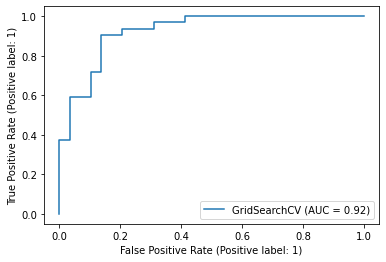

In [57]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

As per the plot above, we can verify that our `Logistic Regression` model tuned with `GridSearchCV` performs really well at predicting, as it gets an AUC score of 0.92(perfect model would achieve 1.0).

### Confusion matrix

A confusion matrix is a way to display where our model made the right predictions and the wrong ones(a.k.a. got confused).

In [58]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


For presentation purposes, we built a heatmap using [Seaborn's heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

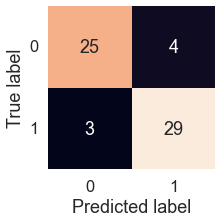

In [61]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using heatmap() from Seaborn
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel('Predicted label') # Predictions on x-axis
    plt.ylabel('True label') # True labels on y-axis
    plt.yticks(rotation=0)

plot_conf_matrix(y_test, y_preds)

Upon observing the plot above, we can conclude that our model predicts the wrong labels relatively equal across both classes.

There are four occasions where the model predict 0(no disease) when it should have been 1 - false negative. On 3 occasions, our model predicted 1(heart disease) instead of 0 - false negative.

### Classification report

This report will provide us with information of the precision and recall of our model for each class.

In [63]:
# Displaying classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In order to solidify these results, we will be cross-validating them.

In [64]:
# Checking best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [67]:
# Importing cross_val_score
from sklearn.model_selection import cross_val_score

# Instanciate best model with best hyperparameters(found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [71]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Get avg of the 5 metrics
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [69]:
# Cross-validate precision score
cv_precision = np.mean(cross_val_score(clf, X, y, cv=5, scoring='precision'))
cv_precision

0.8215873015873015

In [70]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring='recall'))
cv_recall

0.9272727272727274

In [73]:
# Cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring='f1'))
cv_f1

0.8705403543192143

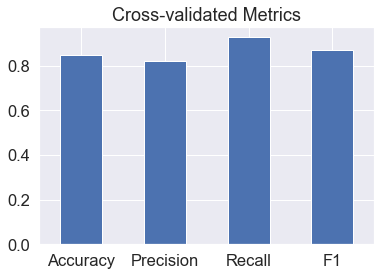

In [75]:
# Visualisation of cross-validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc, 
    'Precision': cv_precision, 
    'Recall': cv_recall, 
    'F1': cv_f1}, 
    index=[0])

cv_metrics.T.plot.bar(title='Cross-validated Metrics', legend=False, rot=0);

## Feature Importance

> Which features contribute the most to the outcomes of the model? In other words, which characteristics contribute the most to a model predictiing whether a participant suffers from heart disease?

In [77]:
# Fitting an instance of LogisticRegression
clf.fit(X_train, y_train)

# Checking coef_
clf.coef_

array([[ 0.00369922, -0.90424086,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120402, -0.57590915,
         0.47095118, -0.6516535 , -0.69984201]])

Combining `coef_` results with our dataframe's features.

In [79]:
# Matching features to columns
features_dict= dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0036992187998289602,
 'sex': -0.9042408617254584,
 'cp': 0.6747282785211093,
 'trestbps': -0.011613403576031968,
 'chol': -0.0017036447029589036,
 'fbs': 0.04787688844705352,
 'restecg': 0.33490185589260435,
 'thalach': 0.02472938483022642,
 'exang': -0.6312040200034894,
 'oldpeak': -0.5759091523131389,
 'slope': 0.4709511814885769,
 'ca': -0.651653504206039,
 'thal': -0.6998420129807071}

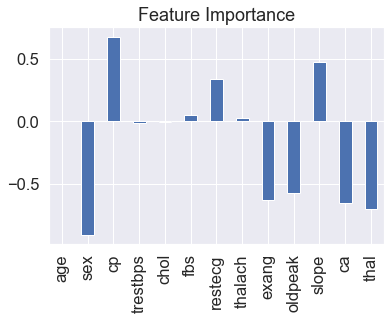

In [84]:
# Visualisation
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);

If the value is negative, it means there is a negative correlation and vice-versa. This can also be seen by comparing a feature to the `target` feature.

In [86]:
# Comparing sex with target
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


**Note:**
* 0 - female
* 1 - male

When `sex` is 0, there are almost three times as many people(72 vs. 24) with heart disease than without, meaning that the model found a pattern which reflects the data.

According to these figures and this specific dataset, it would appear that a female participant is more likely to have heart disease.

With regards to positive correlations:

In [87]:
# Contrast slope(positive coeficient) with target
pd.crosstab(df['slope'], df['target'])


target,0,1
slope,,
0,12,9
1,91,49
2,35,107


`slope` refers to the "slope of the peak exercise ST segment", where:
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downsloping: signs of unhealthy heart

According to the model, there is a positive correlation of 0.47, which is higher than the `sex` feature. In the above table, we can verify that as `slope` increases, so does `target`.

At this stage, it would be worth pointing to the subject matter expert the features where our model found the most patterns(highest correlation) as well as none(lowest correlation). Perhaps, they could shed some light on these findings so that we can progress further, reorganise and collect more data, or discard any unecessary information.


> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.